# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [26]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve
import cv2
import imageio
from skimage.color import rgb2gray
from skimage import filters
from scipy import misc,linalg
from scipy.ndimage import affine_transform, zoom
from scipy import ndimage

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [17]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

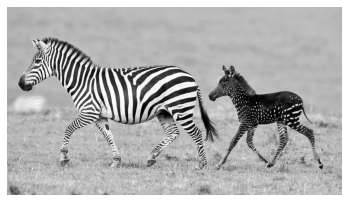

In [3]:
myimshow(zebra)

In [65]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

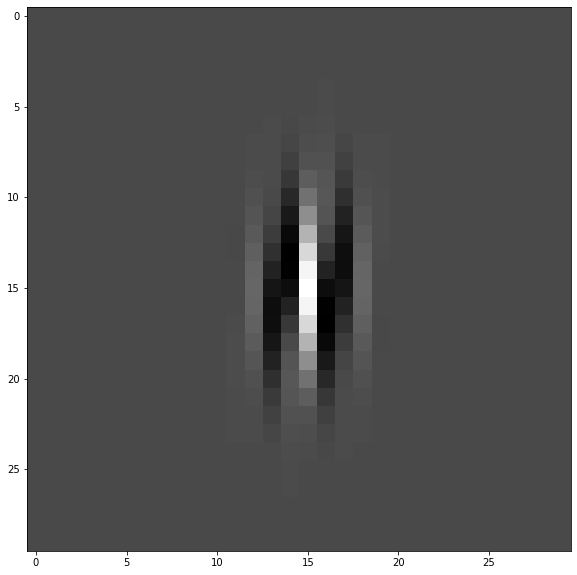

In [66]:
zebra_gabor= genGabor((31, 31), 2.0, np.pi / 45)
plt.imshow(zebra_gabor, cmap='gray')

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

In [76]:
theta = np.arange(0, np.pi, np.pi/4) 

omega = np.arange(0.2, 0.6, 0.1) 

params = [(t,o) for o in omega for t in theta]

sinFilterBank = []
cosFilterBank = []
gaborParams = []

for (theta, omega) in params:
    gaborParam = {'omega':omega, 'theta':theta, 'sz':(128, 128)}
    sinGabor = genGabor(func=np.sin, **gaborParam)
    cosGabor = genGabor(func=np.cos, **gaborParam)
    sinFilterBank.append(sinGabor)
    cosFilterBank.append(cosGabor)
    gaborParams.append(gaborParam)

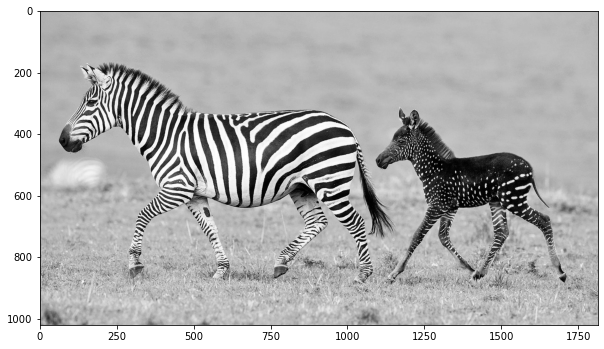

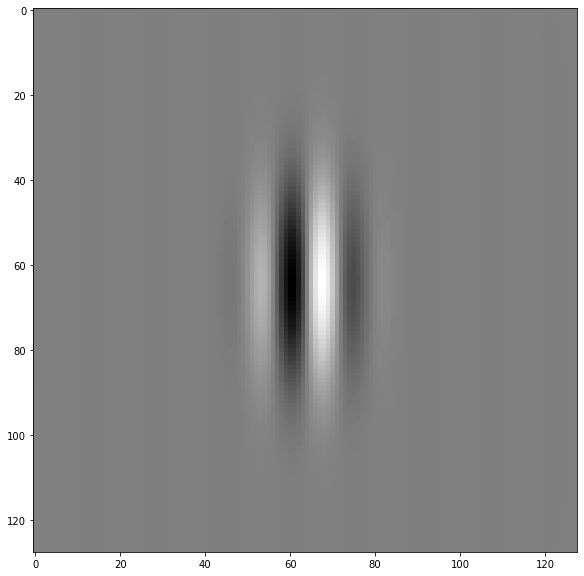

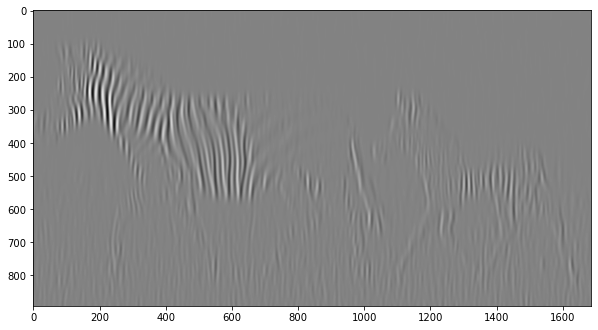

In [79]:
from scipy.signal import convolve2d

plt.figure(); 
plt.imshow(zebra)

sinGabor = sinFilterBank[8] 

plt.figure(); 
plt.imshow(sinGabor, cmap='gray')

res = convolve2d(zebra, sinGabor, mode='valid') 

plt.figure();

plt.imshow(res, cmap='gray') 

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

Il filtro Sobel è il filtro più semplice per il riconoscimento dei contorni (Edge detection). 

L'algoritmo è basato sulla convoluzione dell'immagine con un piccolo filtro, in questo caso viene applicato sia in direzione verticale che orizzontale.

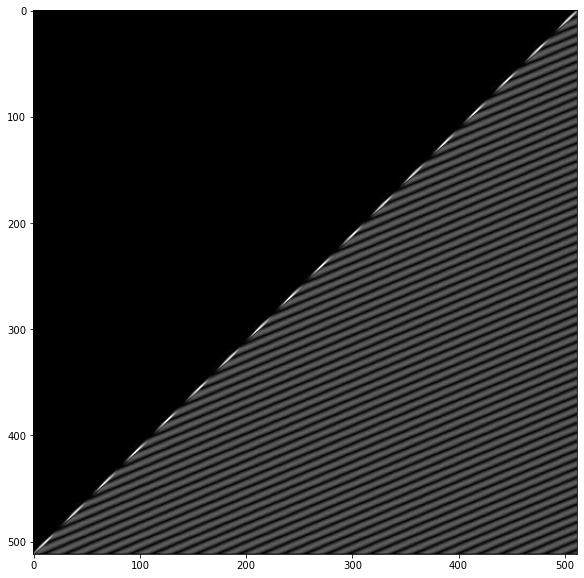

In [84]:
gabor1 =  imageio.imread('gabor1.jpg')

sobel_zebra = filters.sobel(gabor1)

plt.imshow(sobel_zebra, cmap='gray')

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

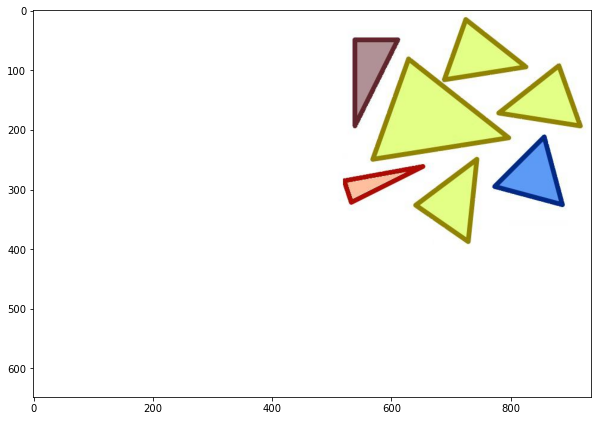

In [86]:
triangoli = np.array(imageio.imread('triangoli.jpg'))
plt.imshow(triangoli)

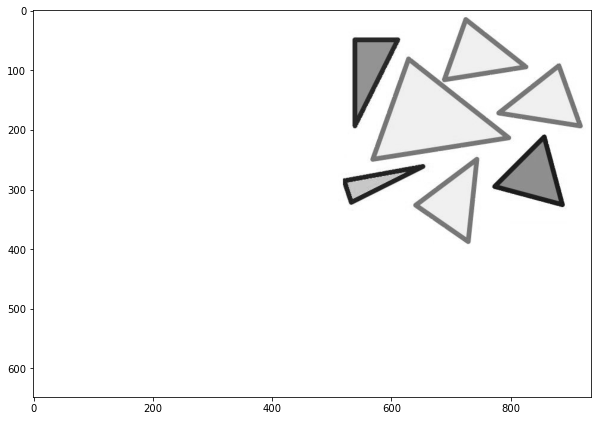

In [87]:
triangoli_gray= rgb2gray(triangoli)
plt.imshow(triangoli_gray)

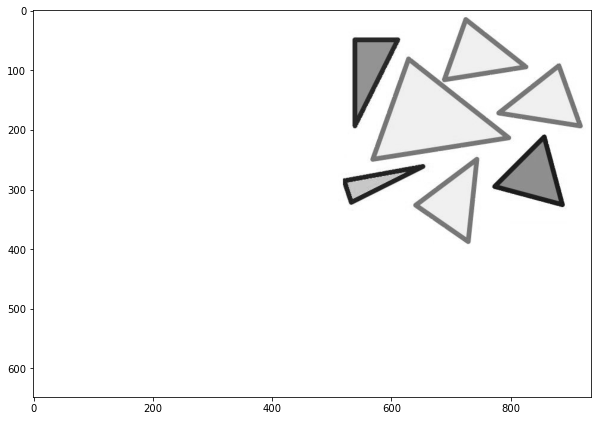

In [94]:
ret, thresh1 = cv2.threshold(triangoli_gray, 120, 255, cv2.THRESH_TOZERO_INV)
  
plt.imshow(thresh1, cmap='gray')

# Esercizio 3

Mostrare gli effetti e spiegare cosa succedequando si applica due volte un filtro gaussiano

Data un'immagine _img_ applicare il filtro gaussiano G

img1 = G(G(img))

A cosa equivale questa trasformazione?
Fornire un esempio

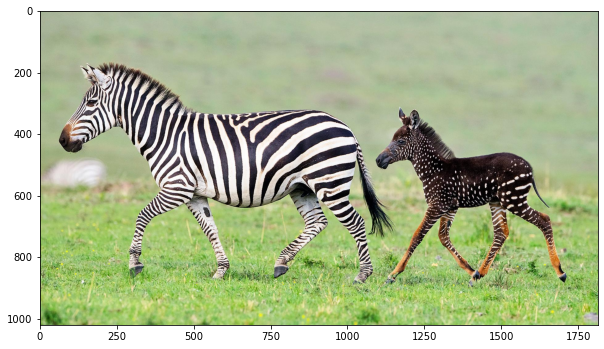

In [19]:
zebra2 = np.array(imageio.imread('zebra.jpg'))
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(zebra2)

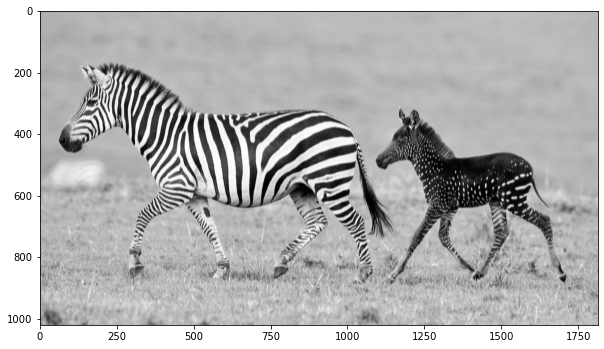

In [34]:
zebra_gray= rgb2gray(zebra2)

gaussian_result = filters.gaussian(zebra_gray, sigma=2, multichannel=True)

plt.imshow(gaussian_result)

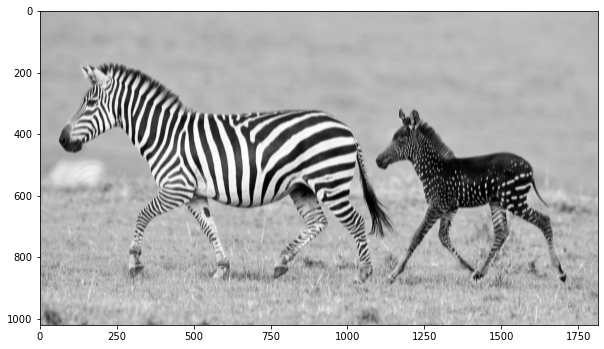

In [35]:
gaussian_result2 = filters.gaussian(gaussian_result, sigma=2, multichannel=True)

plt.imshow(gaussian_result2)

Applicando il filtro gaussiano se l'immagine contiene del rumore, il filtro lo attenua, se si applica di nuovo il filtro all'immagine si ottiene l'immagine leggermente sfocata.

# Esercizio 4

Identificare il filtro e riprodurre lo sketch in figura


![](model1.jpg)
![](model1_post.jpg)

In [154]:
ragazza = np.array(imageio.imread('model1.jpg'))

ragazza_gray= rgb2gray(ragazza)

In [208]:
cv2.adaptiveThreshold?

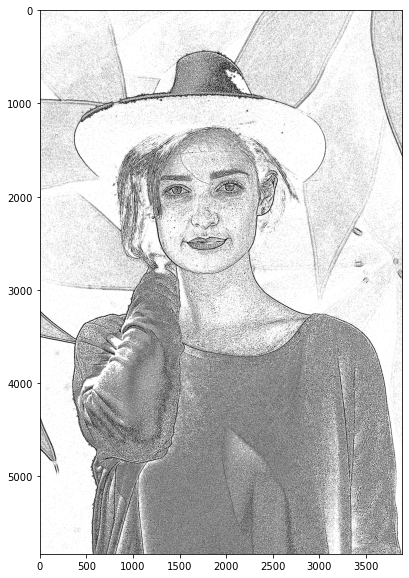

In [218]:
img = cv2.imread('model1.jpg',0)

th3 = cv2.adaptiveThreshold(img,1,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,21,2)

plt.imshow(th3, cmap='gray')

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 60° in senso orario in (15, 7) e una traslazione di 50 px sull'asse y.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

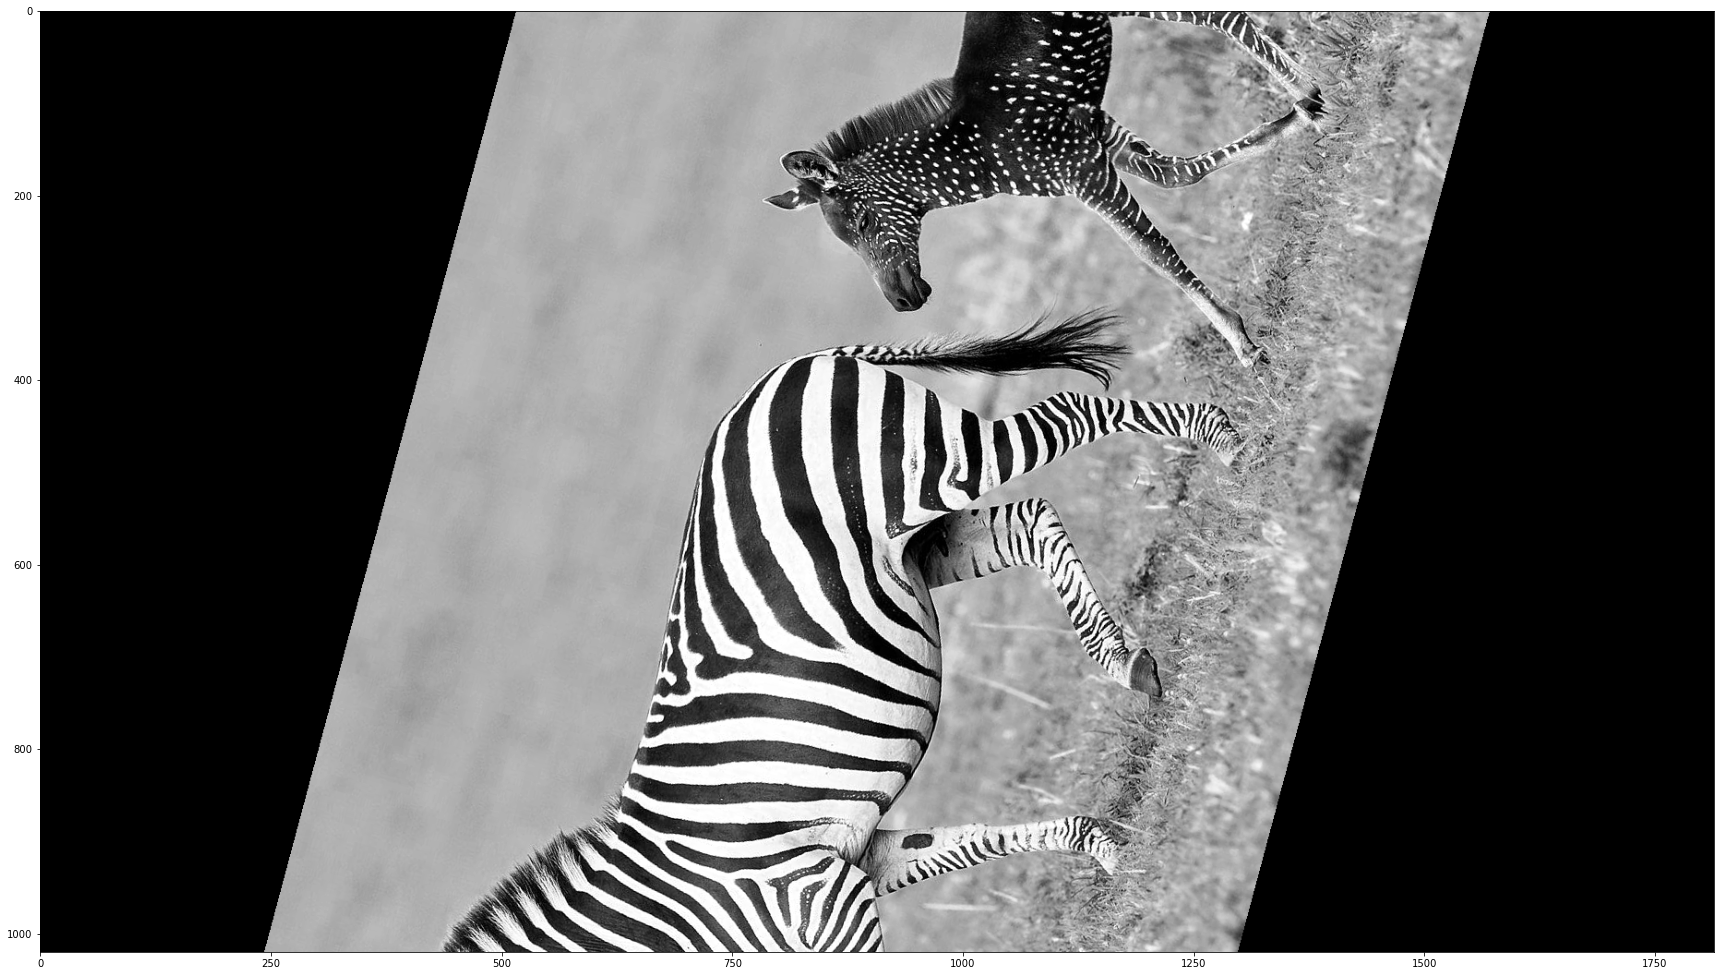

In [206]:
fig = plt.figure(figsize=(30, 30))

src=zebra2[:,:,0]
center=0.5*np.array(src.shape)


a=5*15.0*np.pi/180.0
transform=np.array([[np.cos(a),np.sin(a)],[-np.sin(a),np.cos(a)]])

offset=(center-center.dot(transform)).dot(linalg.inv(transform))
dst=affine_transform(src,transform,order=2,offset=-offset)
    
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(dst,cmap='gray')
    
plt.show()

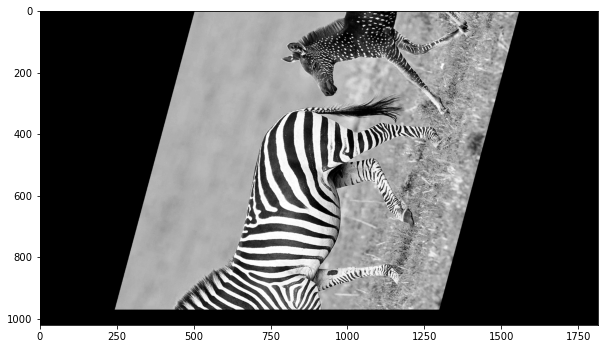

In [207]:
M = np.float32([
[1, 0, 0],
[0, 1, -50]
])

shifted = cv2.warpAffine(dst, M, (zebra.shape[1], zebra.shape[0]))

plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(shifted, cmap='gray')